In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd "/content/drive/My Drive/DeepLearning/3. Logistic regression"
!ls

/content/drive/.shortcut-targets-by-id/1V-PnSf9ldaQeIZdeOMR8t-u8IrHXzsgI/DeepLearning/3. Logistic regression
 dataset.csv	   LogisticRegression.ipynb   MyHomework
 Homework2.ipynb  'Logistic regression.pdf'   TuHoc


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [21]:
# Load data từ file csv
data = pd.read_csv('/content/drive/MyDrive/DeepLearning/3. Logistic regression/dataset.csv').values # dạng ma trận
N, d = data.shape # (20, 3) dạng tuple
X = data[:, 0:d-1].reshape(-1, d-1)
Y = data[:, d-1].reshape(-1, 1) # ko xác định số hàng, nhưng 1 cột
# print(Y)

In [22]:
# Vẽ data bằng scatter
x_cho_vay = X[Y[:,0]==1]
x_tu_choi = X[Y[:,0]==0]

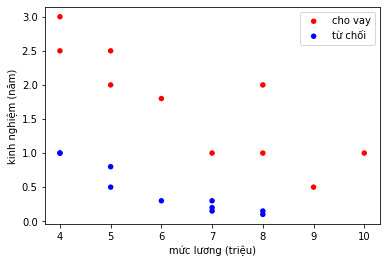

In [23]:
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.legend(loc=1) # loc: location of label dialog

* Từ đồ thị nhận ra cần model giúp vẽ được đường phân chia dữ liệu thành 2 miền
* Tuy nhiên lại muốn kiểm tra xác suất được phân vùng dữ liệu của một điểm dữ liệu mới là bn.

In [31]:
# Thêm cột 1 vào dữ liệu x, tạo dữ liệu input chuẩn
X_bar = np.hstack((np.ones((N, 1)), X))
print(X_bar.shape)

(20, 3)


In [64]:
# Tham số học
w = np.array([0.,0.1,0.1]).reshape(-1,1)
print(w)

[[0. ]
 [0.1]
 [0.1]]


In [65]:
# Số lần lặp bước 2
numOfIteration = 3000
loss = np.zeros((numOfIteration,1))
learning_rate = 0.015

for i in range(1, numOfIteration):
    
	 # Tính giá trị dự đoán
    Y_predict = sigmoid(np.dot(X_bar, w)) # y hat = sigmoid(z)
    # loss tại epoch thứ i
    loss[i] = -np.sum(np.multiply(Y, np.log(Y_predict)) + np.multiply(1-Y, np.log(1-Y_predict)))
    # Gradient descent
    # np.dot: nhan ma tran, * / multiply : element-wise
    w = w - learning_rate * np.dot(X_bar.T, Y_predict-Y)	 
    print(loss[i])

[14.3783222]
[17.64034754]
[26.14430453]
[26.59877792]
[28.50310573]
[24.3927086]
[27.19200496]
[23.92507689]
[25.66999424]
[23.56639867]
[24.17328012]
[23.17656758]
[22.7518239]
[22.72441658]
[21.43869727]
[22.20009976]
[20.25249609]
[21.6111994]
[19.19818508]
[20.97648924]
[18.27023508]
[20.31850934]
[17.45673355]
[19.65788423]
[16.74309089]
[19.01051185]
[16.11463513]
[18.38710866]
[15.55805357]
[17.79401936]
[15.06197263]
[17.23440079]
[14.61701561]
[16.70930151]
[14.21559951]
[16.21847282]
[13.85163543]
[15.76091193]
[13.52022175]
[15.33519711]
[13.21737189]
[14.93968231]
[12.93979145]
[14.57260589]
[12.68470577]
[14.23215177]
[12.44973242]
[13.91648689]
[12.23279017]
[13.62378825]
[12.03203628]
[13.35226557]
[11.84582381]
[13.10018164]
[11.67267289]
[12.8658702]
[11.5112506]
[12.6477507]
[11.36035621]
[12.44433922]
[11.21890931]
[12.25425549]
[11.08593953]
[12.07622604]
[10.96057704]
[11.90908409]
[10.84204363]
[11.75176677]
[10.7296441]
[11.60331039]
[10.62275816]
[11.46284441]


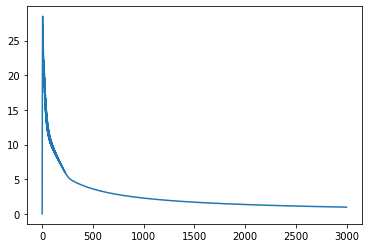

In [66]:
# Show loss function theo #epoch
plt.plot(loss)

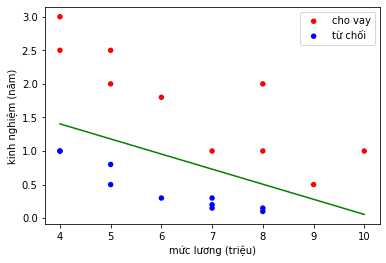

In [78]:
# Vẽ đường phân cách với xác suất > 0.5 thì cho vay
# 1. Dữ liệu train
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

# 2. Đường phân chia
t = 0.5
x_0 = np.array([4, 10])
y_0 = np.array([-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]])
plt.plot(x_0, y_0, 'g')
plt.show()

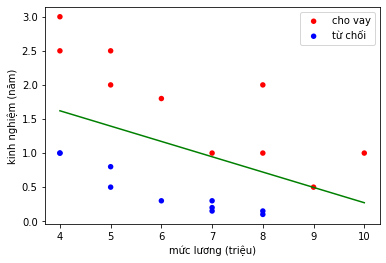

In [79]:
# Vẽ đường phân cách với xác suất > 0.8 thì cho vay
# 1. Dữ liệu train
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

# 2. Đường phân chia
t = 0.8
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()